In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
gwas_P1 = pd.read_csv("./plink_assoc_pheno/plink.P32.assoc.linear", sep = "\s+")

gwas_P1['logP'] = -1 * np.log10(gwas_P1['P'])
gwas_P1['snp_index'] = range(len(gwas_P1))
gwas_P1

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,chrI,.,1074,C,ADD,849,-0.278900,-1.213000,2.256000e-01,0.646661,0
1,chrI,.,1074,C,COV1,849,-33.770000,-7.358000,4.459000e-13,12.350763,1
2,chrI,.,1074,C,COV2,849,0.000443,0.000097,9.999000e-01,0.000043,2
3,chrI,.,1074,C,COV3,849,9.801000,2.094000,3.654000e-02,1.437231,3
4,chrI,.,1074,C,COV4,849,10.120000,2.167000,3.050000e-02,1.515700,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,chrXVI,.,942826,G,COV6,853,-21.650000,-4.777000,2.095000e-06,5.678816,182859
182860,chrXVI,.,942826,G,COV7,853,-11.390000,-2.476000,1.347000e-02,1.870632,182860
182861,chrXVI,.,942826,G,COV8,853,-8.988000,-1.960000,5.028000e-02,1.298605,182861
182862,chrXVI,.,942826,G,COV9,853,19.770000,4.350000,1.525000e-05,4.816730,182862


# Identifiy top SNP for P32 or Tunicamycin

In [5]:
gwas_P1.loc[gwas_P1['logP'].idxmax()]

CHR                 23
SNP                  .
BP              657858
A1                   A
TEST               ADD
NMISS              906
BETA             1.889
STAT             14.54
P            3.961e-43
logP           42.4022
snp_index        97537
Name: 97537, dtype: object

# Convert the vcf file and specify for top SNP

In [ ]:
%%bash
plink --vcf /Users/cmdb/qbb2020-answers/week3/lab_hw/BYxRM_segs_saccer3.bam.simplified.vcf \
--recodeA \
--allow-extra-chr \
--chr chrX \
--from-bp 657858 --to-bp 657858 --out please_work

# Check Sanity

In [6]:
%%bash
cat please_work.raw

FID IID PAT MAT SEX PHENOTYPE ._A
A01 01 0 0 0 -9 2
A01 02 0 0 0 -9 2
A01 03 0 0 0 -9 0
A01 04 0 0 0 -9 2
A01 05 0 0 0 -9 0
A01 06 0 0 0 -9 2
A01 07 0 0 0 -9 0
A01 08 0 0 0 -9 0
A01 09 0 0 0 -9 2
A01 10 0 0 0 -9 0
A01 11 0 0 0 -9 0
A01 12 0 0 0 -9 2
A01 13 0 0 0 -9 0
A01 14 0 0 0 -9 0
A01 15 0 0 0 -9 0
A01 16 0 0 0 -9 2
A01 17 0 0 0 -9 2
A01 18 0 0 0 -9 0
A01 19 0 0 0 -9 2
A01 20 0 0 0 -9 0
A01 21 0 0 0 -9 2
A01 22 0 0 0 -9 2
A01 23 0 0 0 -9 0
A01 24 0 0 0 -9 0
A01 25 0 0 0 -9 1
A01 26 0 0 0 -9 2
A01 27 0 0 0 -9 2
A01 28 0 0 0 -9 0
A01 29 0 0 0 -9 2
A01 30 0 0 0 -9 2
A01 31 0 0 0 -9 2
A01 32 0 0 0 -9 0
A01 33 0 0 0 -9 0
A01 34 0 0 0 -9 0
A01 35 0 0 0 -9 2
A01 36 0 0 0 -9 2
A01 37 0 0 0 -9 2
A01 38 0 0 0 -9 2
A01 39 0 0 0 -9 2
A01 40 0 0 0 -9 0
A01 41 0 0 0 -9 0
A01 42 0 0 0 -9 2
A01 43 0 0 0 -9 2
A01 44 0 0 0 -9 0
A01 45 0 0 0 -9 NA
A01 46 0 0 0 -9 0
A01 47 0 0 0 -9 0
A01 48 0 0 0 -9 2
A01 49 0 0 0 -9 2
A01 50 0 0 0 -9 0
A01 51 0 0 0 -9 0
A01 52 0 0 0 -9 0
A01 53 0 0 0 -9 2
A01 54 0 0 

# Create DataFrame

In [7]:
genotype = pd.read_csv('please_work.raw', sep = " ") #space separated file
genotype['subject_id'] = genotype['FID'].astype(str) + "_" + genotype['IID'].astype(str)
#create a new column combining family ID and Individual ID
genotype

,FID,IID,PAT,MAT,SEX,PHENOTYPE,._A,subject_id
0,A01,1,0,0,0,-9,2.0,A01_1
1,A01,2,0,0,0,-9,2.0,A01_2
2,A01,3,0,0,0,-9,0.0,A01_3
3,A01,4,0,0,0,-9,2.0,A01_4
4,A01,5,0,0,0,-9,0.0,A01_5
...,...,...,...,...,...,...,...,...
1051,A11,92,0,0,0,-9,2.0,A11_92
1052,A11,93,0,0,0,-9,0.0,A11_93
1053,A11,94,0,0,0,-9,0.0,A11_94
1054,A11,95,0,0,0,-9,0.0,A11_95


# Create DataFrame of previously isolatied Tunicamycin Phenotype

In [8]:
phenotype = pd.read_csv('/Users/cmdb/qbb2020-answers/week3/lab_hw/PhenoData_32_final.txt', sep = "\t")
phenotype['subject_id'] = phenotype['FID'].astype(str) + "_" + phenotype['IID'].astype(str)
phenotype

,FID,IID,Tunicamycin,subject_id
0,A01,1,0.760529,A01_1
1,A01,2,-0.598586,A01_2
2,A01,3,-3.277704,A01_3
3,A01,4,-5.103462,A01_4
4,A01,5,-4.899520,A01_5
...,...,...,...,...
1003,A11,92,9.137122,A11_92
1004,A11,93,3.450945,A11_93
1005,A11,94,2.100915,A11_94
1006,A11,95,-0.285850,A11_95


In [9]:
assoc_input = pd.merge(genotype, phenotype, on = "subject_id")
assoc_input

,FID_x,IID_x,PAT,MAT,SEX,PHENOTYPE,._A,subject_id,FID_y,IID_y,Tunicamycin
0,A01,1,0,0,0,-9,2.0,A01_1,A01,1,0.760529
1,A01,2,0,0,0,-9,2.0,A01_2,A01,2,-0.598586
2,A01,3,0,0,0,-9,0.0,A01_3,A01,3,-3.277704
3,A01,4,0,0,0,-9,2.0,A01_4,A01,4,-5.103462
4,A01,5,0,0,0,-9,0.0,A01_5,A01,5,-4.899520
...,...,...,...,...,...,...,...,...,...,...,...
1003,A11,92,0,0,0,-9,2.0,A11_92,A11,92,9.137122
1004,A11,93,0,0,0,-9,0.0,A11_93,A11,93,3.450945
1005,A11,94,0,0,0,-9,0.0,A11_94,A11,94,2.100915
1006,A11,95,0,0,0,-9,0.0,A11_95,A11,95,-0.285850


In [11]:
df_new = assoc_input.rename(columns={'._A': 'Genotype'})
df_new

,FID_x,IID_x,PAT,MAT,SEX,PHENOTYPE,Genotype,subject_id,FID_y,IID_y,Tunicamycin
0,A01,1,0,0,0,-9,2.0,A01_1,A01,1,0.760529
1,A01,2,0,0,0,-9,2.0,A01_2,A01,2,-0.598586
2,A01,3,0,0,0,-9,0.0,A01_3,A01,3,-3.277704
3,A01,4,0,0,0,-9,2.0,A01_4,A01,4,-5.103462
4,A01,5,0,0,0,-9,0.0,A01_5,A01,5,-4.899520
...,...,...,...,...,...,...,...,...,...,...,...
1003,A11,92,0,0,0,-9,2.0,A11_92,A11,92,9.137122
1004,A11,93,0,0,0,-9,0.0,A11_93,A11,93,3.450945
1005,A11,94,0,0,0,-9,0.0,A11_94,A11,94,2.100915
1006,A11,95,0,0,0,-9,0.0,A11_95,A11,95,-0.285850


# Create BoxPlot of Phenotype Stratified by Genotype for the Top SNP

Text(0.5, 0.98, '')

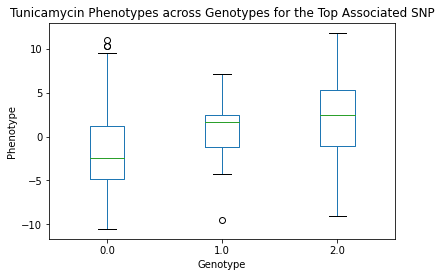

In [12]:
df_new.boxplot(by ='Genotype', column =['Tunicamycin'], grid = False) 
plt.title("Tunicamycin Phenotypes across Genotypes for the Top Associated SNP")
plt.ylabel("Phenotype")
plt.suptitle("")